# Assignment 2: Exploratory Analysis and Data Cleaning
Choosen Dataset:
[Data Science Job Posting on Glassdoor](https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor)

Group Members:


*   Ali Zahedzadeh
*   Melika Nobakhtian



**About Dataset:**
Dataset is a csv file that contains information about job offers for the position of a Data Scientist from the Glassdoor website.

**Import Libraries**

In [51]:
import pandas as pd
import io
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

**Reading Uncleaned Dataset**

In [52]:
df = pd.read_csv('ds-jobs.csv')

Now let's take a look at the first 5 rows of the data:

In [53]:
df.head(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


df.info() shows that we have no NaN value but we should be careful about this. It is possible that they are presented with another value.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [55]:
df.describe()

,index,Rating,Founded
count,672.000000,672.000000,672.000000
mean,335.500000,3.518601,1635.529762
std,194.133974,1.410329,756.746640
min,0.000000,-1.000000,-1.000000
25%,167.750000,3.300000,1917.750000
50%,335.500000,3.800000,1995.000000
75%,503.250000,4.300000,2009.000000
max,671.000000,5.000000,2019.000000


## Some Insights from Our Data

Let's take a look at dataset and find out which industries have provided more job opportunities.

In [56]:
df['Industry'].value_counts()[:20]

Industry
-1                                         71
Biotech & Pharmaceuticals                  66
IT Services                                61
Computer Hardware & Software               57
Aerospace & Defense                        46
Enterprise Software & Network Solutions    43
Consulting                                 38
Staffing & Outsourcing                     36
Insurance Carriers                         28
Internet                                   27
Advertising & Marketing                    23
Health Care Services & Hospitals           21
Research & Development                     17
Federal Agencies                           16
Investment Banking & Asset Management      13
Banks & Credit Unions                       8
Lending                                     8
Energy                                      5
Consumer Products Manufacturing             5
Telecommunications Services                 5
Name: count, dtype: int64

<Axes: title={'center': 'Industries Hiring'}, xlabel='Industry'>

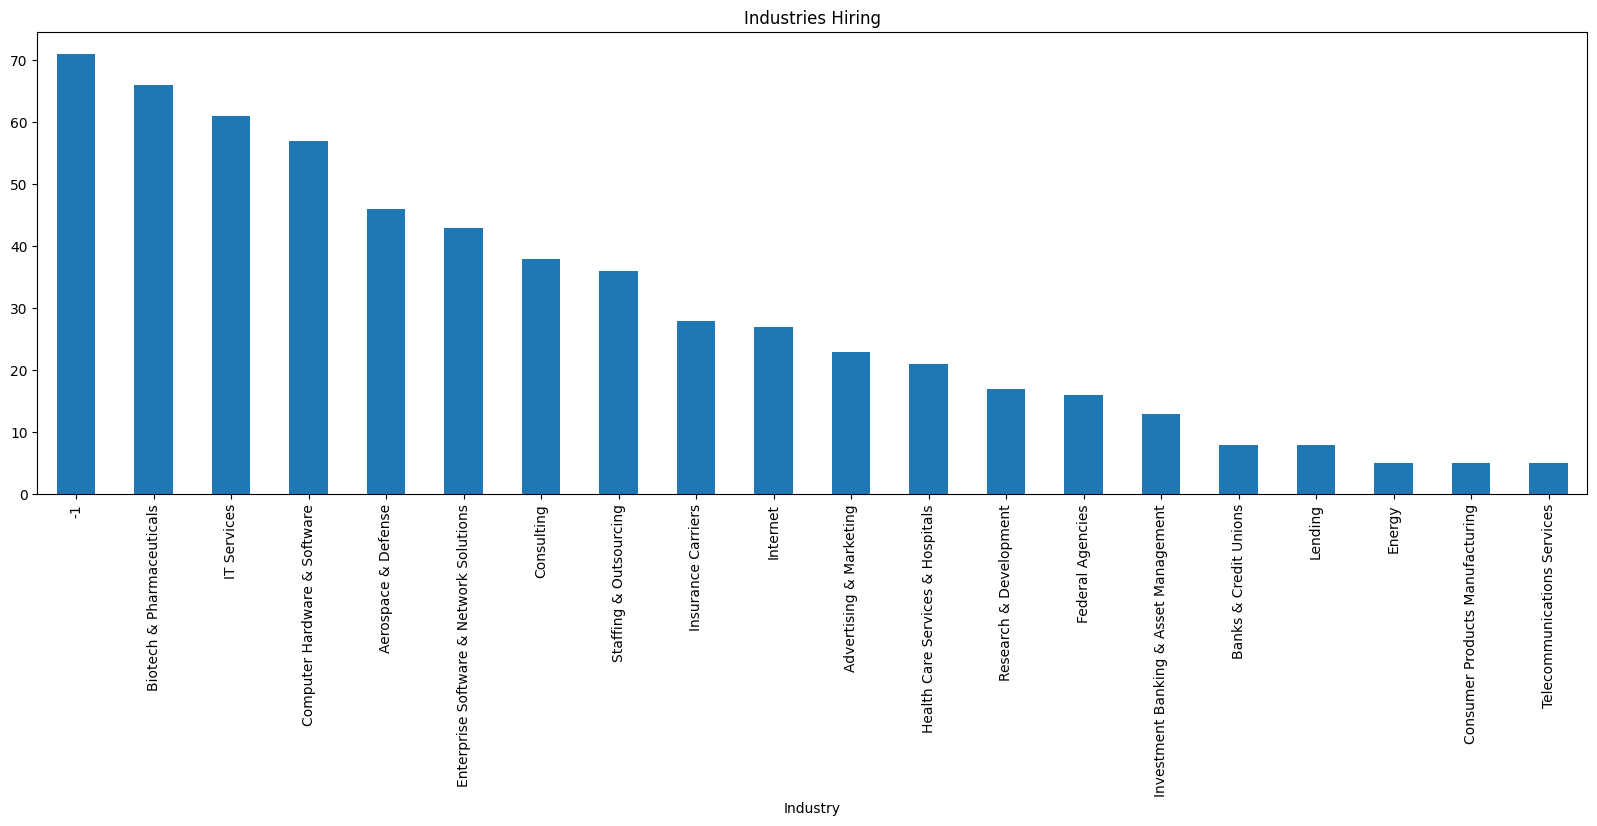

In [57]:
df['Industry'].value_counts()[:20].plot.bar(figsize=(20, 6),title='Industries Hiring')

Now we want to know more about the size of different companies!

In [58]:
df['Size'].value_counts()

Size
51 to 200 employees        135
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        85
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
-1                          27
Unknown                     17
Name: count, dtype: int64

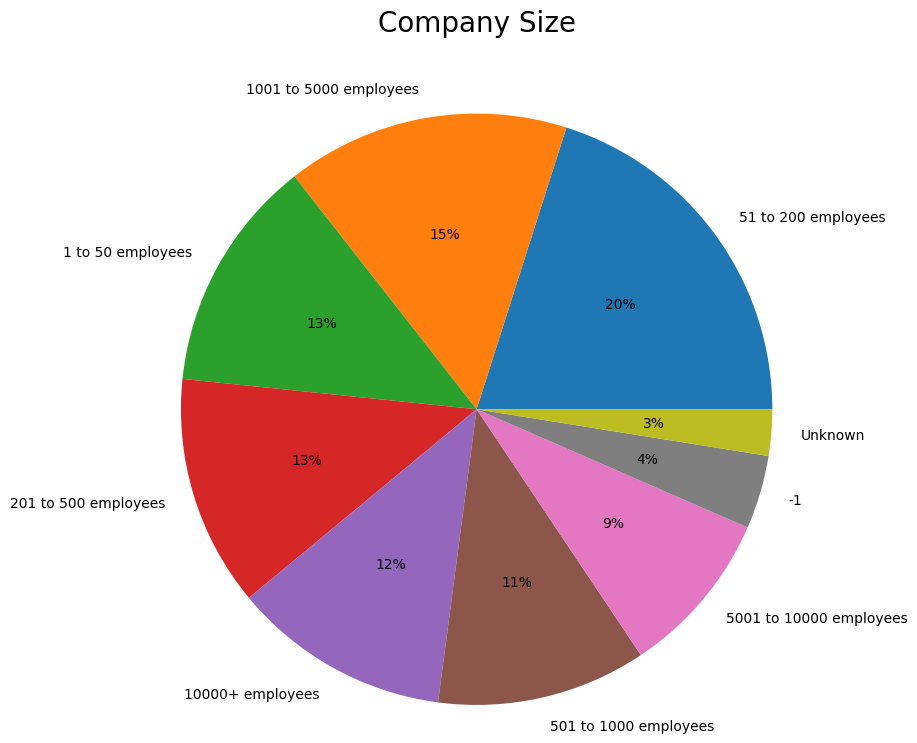

In [59]:
df['Size'].value_counts().plot.pie(autopct='%1.0f%%',radius=2,ylabel='')
plt.title('Company Size', y=1.5,fontsize=20)
plt.show()

For now, we just have 2 numerical features. So look at the scatter plot that shows the relation between them

<Axes: xlabel='Founded', ylabel='Rating'>

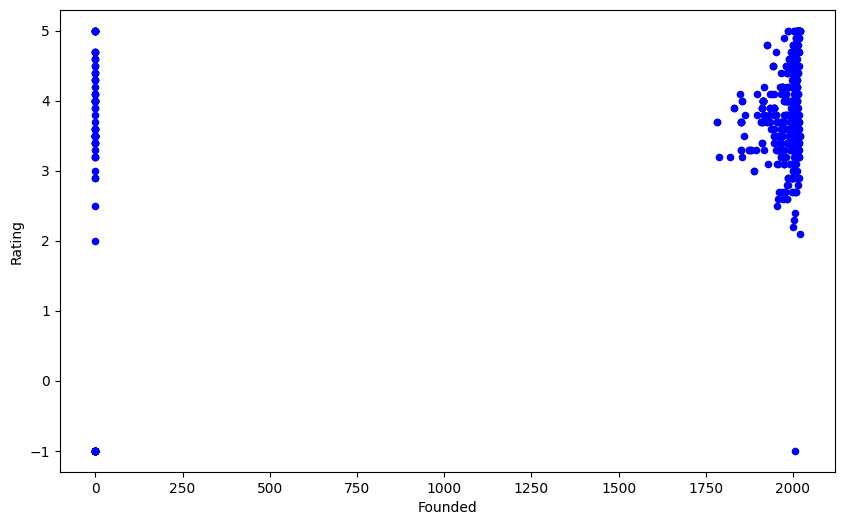

In [60]:
df.plot(kind='scatter', x='Founded', y='Rating', color='b',figsize=(10, 6))

Let's take a closer look at **IT Services Industry**. Here, google colab plot suggestion helped us to have more interesting plots!

In [61]:
df[df['Industry']=='IT Services']

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
11,11,Data Scientist,$137K-$171K (Glassdoor est.),About Us\n\n\nInterested in working for a huma...,4.7,1904labs\n4.7,"Saint Louis, MO","Saint Louis, MO",51 to 200 employees,2016,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,"Slalom, Daugherty Business Solutions"
32,32,Data Scientist,$75K-$131K (Glassdoor est.),Cohere Health is simplifying healthcare for pa...,5.0,Cohere Health\n5.0,"Boston, MA","Boston, MA",1 to 50 employees,2019,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1
53,53,Jr. Data Engineer,$75K-$131K (Glassdoor est.),Jr. Data Engineer\n\nJob Details\nLevel\nEntry...,4.8,IT Concepts\n4.8,Remote,"Vienna, VA",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1
81,81,Data Scientist,$79K-$131K (Glassdoor est.),The Senior Data Scientist will build and impro...,3.6,Powertek\n3.6,"Washington, DC","Rockville, MD",51 to 200 employees,2001,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1
91,91,Machine Learning Engineer,$79K-$131K (Glassdoor est.),"Machine Learning Engineer Springfield, VA\n\nM...",4.4,NuWave Solutions\n4.4,"Springfield, VA","Mc Lean, VA",51 to 200 employees,1999,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,630,Data Scientist,$87K-$141K (Glassdoor est.),"eGlobalTech, one of Northern Virginia’s fastes...",3.7,EGlobalTech\n3.7,"Arlington, VA","Vienna, VA",201 to 500 employees,2004,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1
636,636,Data Scientist - TS/SCI Required,$92K-$155K (Glassdoor est.),US Citizenship Required and (TS or TS/SCI) Req...,5.0,Phoenix Operations Group\n5.0,"Baltimore, MD","Woodbine, MD",1 to 50 employees,2011,Company - Private,IT Services,Information Technology,$1 to $5 million (USD),-1
641,641,Data Scientist,$92K-$155K (Glassdoor est.),Domain Experience:\n\n3+ years-experience in m...,4.7,Unicom Technologies INC\n4.7,"Chicago, IL","Naperville, IL",51 to 200 employees,-1,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1
658,658,Data Scientist,$105K-$167K (Glassdoor est.),The work is in support of targeting and watchl...,3.8,"Aveshka, Inc.\n3.8","Washington, DC","Arlington, VA",51 to 200 employees,2010,Company - Public,IT Services,Information Technology,$10 to $25 million (USD),-1


In [62]:
df[df['Industry']=='IT Services'].groupby(['Location'])['Rating'].mean()

Location
Annapolis Junction, MD        5.000000
Arlington, VA                 3.700000
Atlanta, GA                   4.033333
Baltimore, MD                 5.000000
Boston, MA                    5.000000
Burbank, CA                  -1.000000
Chicago, IL                   3.850000
Fort Belvoir, VA              4.300000
Foster City, CA               4.200000
Germantown, MD                3.600000
Hartford, CT                  4.500000
Herndon, VA                   4.200000
Jersey City, NJ               4.800000
Lombard, IL                   2.700000
Mountain View, CA             3.100000
New York, NY                  4.500000
Norfolk, VA                  -1.000000
Oakland, CA                   3.700000
Patuxent, Anne Arundel, MD    3.400000
Piscataway, NJ                4.600000
Remote                        4.800000
Reston, VA                    0.833333
Saint Louis, MO               4.700000
San Francisco, CA             3.900000
Santa Clara, CA               4.100000
Silver Spring, M

**Based on the insights we have gained until now, we know that NaN values are replaced with -1. We will deal with this issue in next part**

# Data Cleaning

Before any cleaning, we check for duplicate data. We will remove them if it is necessary.

In [63]:
df[df.duplicated()]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


Although we have duplicate data but it may happened because a company wanted more than one person for a position and they had several opportunities. So it is prefered that to keep them in df.

In [64]:
df['Rating'] = df['Rating'].astype(np.float64)
df['Founded'] = df['Founded'].astype(int)

Firstly, we want to clean **Salary Estimate** column and reach out a better salary range for this column

In [65]:
df['Salary Estimate'].unique()

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

In [66]:
df['Salary Estimate'].apply(lambda x: x.split('(')[0]).unique()

array(['$137K-$171K ', '$75K-$131K ', '$79K-$131K ', '$99K-$132K ',
       '$90K-$109K ', '$101K-$165K ', '$56K-$97K ', '$79K-$106K ',
       '$71K-$123K ', '$90K-$124K ', '$91K-$150K ', '$141K-$225K ',
       '$145K-$225K', '$79K-$147K ', '$122K-$146K ', '$112K-$116K ',
       '$110K-$163K ', '$124K-$198K ', '$79K-$133K ', '$69K-$116K ',
       '$31K-$56K ', '$95K-$119K ', '$212K-$331K ', '$66K-$112K ',
       '$128K-$201K ', '$138K-$158K ', '$80K-$132K ', '$87K-$141K ',
       '$92K-$155K ', '$105K-$167K '], dtype=object)

In [67]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [68]:
df['Salary Estimate'].apply(lambda x: x.replace('K','').replace('$','')).unique()

array(['137-171 ', '75-131 ', '79-131 ', '99-132 ', '90-109 ', '101-165 ',
       '56-97 ', '79-106 ', '71-123 ', '90-124 ', '91-150 ', '141-225 ',
       '145-225', '79-147 ', '122-146 ', '112-116 ', '110-163 ',
       '124-198 ', '79-133 ', '69-116 ', '31-56 ', '95-119 ', '212-331 ',
       '66-112 ', '128-201 ', '138-158 ', '80-132 ', '87-141 ', '92-155 ',
       '105-167 '], dtype=object)

In [69]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K','').replace('$',''))

Now we have a better structure for this feature. We can append some new columns to the dataframe based on new information:


*   Min Salary
*   Max Salary
*   Avg Salary



In [70]:
df['min_salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137,171
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137,171
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171


In [71]:
df['avg_salary'] = (df.min_salary+df.max_salary)//2
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137,171,154
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137,171,154
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171,154


Next column will be Company Name! According to the original DataFrame, it is obvious '\n' is in company name. We aim to extract just company name from the string

In [72]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137,171,154
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137,171,154
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171,154


In the following, we will clean **Revenue** column:

In [73]:
key_value_map = {
    'Unknown / Non-Applicable': [-1, -1],
    '$100 to $500 million (USD)': [100, 500],
    '$10+ billion (USD)': [10000, 10000],
    '$2 to $5 billion (USD)': [2000, 5000],
    '$10 to $25 million (USD)': [10, 25],
    '$1 to $2 billion (USD)': [1000, 2000],
    '$25 to $50 million (USD)': [25, 50],
    '$50 to $100 million (USD)': [50, 100],
    '$1 to $5 million (USD)': [1, 5],
    '-1': [-1, -1],
    '$500 million to $1 billion (USD)': [500, 1000],
    '$5 to $10 million (USD)': [5, 10],
    'Less than $1 million (USD)': [1, 1],
    '$5 to $10 billion (USD)': [5000, 10000],
    }

def extarct_min_revenue(row):
    revenue = row['Revenue']
    return key_value_map[revenue][0]

def extarct_max_revenue(row):
    revenue = row['Revenue']
    return key_value_map[revenue][1]

df['min_revenue_per_milion_usd'] = df.apply(extarct_min_revenue, axis=1)
df['max_revenue_per_milion_usd'] = df.apply(extarct_max_revenue, axis=1)

In [74]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,min_revenue_per_milion_usd,max_revenue_per_milion_usd
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154,-1,-1
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137,171,154,1000,2000
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137,171,154,100,500
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154,100,500
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171,154,-1,-1


Clean **Size** column and handle missing values:

In [75]:
def extarct_min_size(row):
    temp = row['Size'].split()
    if len(temp) == 2:
        #for 10000+ values
        return 10000
    elif len(temp) == 1:
        #for Unknow values
        return -1
    return int(row['Size'].split()[0])

def extarct_max_size(row):
    temp = row['Size'].split()
    if len(temp) == 2:
        #for 10000+ values
        return 10000
    elif len(temp) == 1:
        #for Unknow values
        return -1
    #for other values
    return int(row['Size'].split()[2])
df['min_size'] = df.apply(extarct_min_size, axis=1)
df['max_size'] = df.apply(extarct_max_size, axis=1)

In [76]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,min_revenue_per_milion_usd,max_revenue_per_milion_usd,min_size,max_size
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154,-1,-1,1001,5000
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,Business Services,$1 to $2 billion (USD),-1,137,171,154,1000,2000,5001,10000
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,...,Business Services,$100 to $500 million (USD),-1,137,171,154,100,500,1001,5000
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154,100,500,501,1000
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171,154,-1,-1,51,200


Replace all -1 values with NaN (because in this dataset -1 means NaN)

In [77]:
df.replace(-1.0,np.nan, inplace=True)
df.replace('-1',np.nan, inplace=True)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,min_revenue_per_milion_usd,max_revenue_per_milion_usd,min_size,max_size
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,...,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154,NaN,NaN,1001.0,5000.0
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,...,Business Services,$1 to $2 billion (USD),NaN,137,171,154,1000.0,2000.0,5001.0,10000.0
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,...,Business Services,$100 to $500 million (USD),NaN,137,171,154,100.0,500.0,1001.0,5000.0
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,...,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154,100.0,500.0,501.0,1000.0
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,...,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171,154,NaN,NaN,51.0,200.0


Now , we look the null result:

In [78]:
df.isna().sum()

index                           0
Job Title                       0
Salary Estimate                 0
Job Description                 0
Rating                         50
Company Name                    0
Location                        0
Headquarters                   31
Size                           27
Founded                       118
Type of ownership              27
Industry                       71
Sector                         71
Revenue                        27
Competitors                   501
min_salary                      0
max_salary                      0
avg_salary                      0
min_revenue_per_milion_usd    240
max_revenue_per_milion_usd    240
min_size                       44
max_size                       44
dtype: int64

**Competitors** column has so many null values!So it is more beneficial to drop this column:

In [79]:
df.drop(columns=['Competitors'],inplace=True)

**"Rating"** is the next coloumn! From the chart in the previous cells we saw that some ratings are -1 but we should replace this value with a better candidate.

In [80]:
mean_of_rating = df['Rating'].mean()
df['Rating'] = df['Rating'].fillna(mean_of_rating)

In [81]:
df.sort_values(by='Rating', ascending=True)[:5]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,min_revenue_per_milion_usd,max_revenue_per_milion_usd,min_size,max_size
579,579,Scientist/Research Associate-Metabolic Enginee...,138-158,*Our company:\n*Conagen Inc. is a leader in cu...,2.0,Conagen,"New Bedford, MA","Bedford, MA",51 to 200 employees,NaN,...,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,138,158,148,NaN,NaN,51.0,200.0
444,444,Data Scientist,79-133,About Hive\n\nHive is a full-stack deep learni...,2.1,Hive (CA),"San Francisco, CA","Los Angeles, CA",Unknown,2019.0,...,Telecommunications Services,Telecommunications,Unknown / Non-Applicable,79,133,106,NaN,NaN,NaN,NaN
38,38,Data Scientist,75-131,Job Title: Data Scientists\n\nJob Description\...,2.2,Great-Circle Technologies,"Chantilly, VA","Chantilly, VA",1 to 50 employees,2000.0,...,Enterprise Software & Network Solutions,Information Technology,$1 to $5 million (USD),75,131,103,1.0,5.0,1.0,50.0
169,169,Sr Data Analyst,101-165,"Position location: Lake Mary, FLorBlue Bell, P...",2.3,United BioSource,"Blue Bell, PA","Blue Bell, PA",1001 to 5000 employees,2003.0,...,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$100 to $500 million (USD),101,165,133,100.0,500.0,1001.0,5000.0
147,147,Scientist - Biomarker and Flow Cytometry,90-109,"Crown Bioscience, a JSR Life Sciences company,...",2.4,Crown Bioscience,"San Diego, CA","San Diego, CA",501 to 1000 employees,2006.0,...,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$50 to $100 million (USD),90,109,99,50.0,100.0,501.0,1000.0


In [82]:
df.isna().sum()

index                           0
Job Title                       0
Salary Estimate                 0
Job Description                 0
Rating                          0
Company Name                    0
Location                        0
Headquarters                   31
Size                           27
Founded                       118
Type of ownership              27
Industry                       71
Sector                         71
Revenue                        27
min_salary                      0
max_salary                      0
avg_salary                      0
min_revenue_per_milion_usd    240
max_revenue_per_milion_usd    240
min_size                       44
max_size                       44
dtype: int64

**Headquarters** : replace Nan values with 'Unknown'

In [83]:
df['Headquarters'] = df['Headquarters'].fillna('Unknown')

**Size** : replace Nan values with 'Unknown'

In [84]:
df['Size'] = df['Size'].fillna('Unknown')

**Revenue** : replace Nan values with 'Unknown / Non-Applicable' like others

In [85]:
df['Revenue'] = df['Revenue'].fillna('Unknown / Non-Applicable')

**Industry** : replace Nan values with 'Unknown'

**Sector** : replace Nan values with 'Unknown'

**Type of ownership** : replace Nan values with 'Unknown'

In [86]:
df['Industry'] = df['Industry'].fillna('Unknown')
df['Sector'] = df['Sector'].fillna('Unknown')
df['Type of ownership'] = df['Type of ownership'].fillna('Unknown')

**Founded** : replace Nan values 0

In [87]:
df['Founded'] = df['Founded'].fillna(0)

**min_revenue_per_milion_usd** : replace Nan values with mean of sum of both min and max revenue

**max_revenue_per_milion_usd** : replace Nan values with mean of sum of both min and max revenue

**min_size** : replace Nan values with mean of sum of both min and max size

**max_size** : replace Nan values with mean of sum of both min and max size

In [88]:
mean_of_size = (df['min_size'] + df['max_size']).mean()
mean_of_revenue = (df['min_revenue_per_milion_usd'] + df['max_revenue_per_milion_usd']).mean()
df['min_size'] = df['min_size'].fillna(mean_of_size)
df['max_size'] = df['max_size'].fillna(mean_of_size)
df['min_revenue_per_milion_usd'] = df['min_revenue_per_milion_usd'].fillna(mean_of_revenue)
df['max_revenue_per_milion_usd'] = df['max_revenue_per_milion_usd'].fillna(mean_of_revenue)

In [89]:
df.isna().sum()

index                         0
Job Title                     0
Salary Estimate               0
Job Description               0
Rating                        0
Company Name                  0
Location                      0
Headquarters                  0
Size                          0
Founded                       0
Type of ownership             0
Industry                      0
Sector                        0
Revenue                       0
min_salary                    0
max_salary                    0
avg_salary                    0
min_revenue_per_milion_usd    0
max_revenue_per_milion_usd    0
min_size                      0
max_size                      0
dtype: int64

**Location** has info about both state and city of job. We add two new columns **Job State/Country** and **Job City**.

In [90]:
df['job_state_country'] = df['Location'].apply(lambda x: x.split(',')[-1])
df['job_city'] = df['Location'].apply(lambda x: x.split(',')[0])
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Revenue,min_salary,max_salary,avg_salary,min_revenue_per_milion_usd,max_revenue_per_milion_usd,min_size,max_size,job_state_country,job_city
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,...,Unknown / Non-Applicable,137,171,154,4391.456019,4391.456019,1001.0,5000.0,NY,New York
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,...,$1 to $2 billion (USD),137,171,154,1000.000000,2000.000000,5001.0,10000.0,VA,Chantilly
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,...,$100 to $500 million (USD),137,171,154,100.000000,500.000000,1001.0,5000.0,MA,Boston
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,...,$100 to $500 million (USD),137,171,154,100.000000,500.000000,501.0,1000.0,MA,Newton
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,...,Unknown / Non-Applicable,137,171,154,4391.456019,4391.456019,51.0,200.0,NY,New York


Nearly all of the values in job state column are in form of abbreviation. Due to this, it is better to replace others with their short form.

In [91]:
df['job_state_country'].value_counts()

job_state_country
 CA              165
 VA               89
 MA               62
 NY               52
 MD               40
 IL               30
 DC               26
 TX               17
 WA               16
 OH               14
 PA               12
 MO               12
United States     11
 NJ               10
 CO               10
 GA                9
 NC                9
 TN                8
 FL                8
Remote             6
 OK                6
 WI                6
 IN                5
 MI                5
 AL                4
 CT                4
 MN                4
 AZ                4
 NE                3
 UT                3
 IA                3
 RI                2
New Jersey         2
 SC                2
 OR                2
Utah               2
 NH                2
 MS                1
 LA                1
 KS                1
Texas              1
 DE                1
California         1
 WV                1
Name: count, dtype: int64

In [92]:
df['job_state_country'].replace(['United States','Texas','California','New Jersey','Remote','Utah']
                               ,["US","TX","CA","NJ","WFH","UT"],inplace=True)
df['job_state_country'].value_counts()

job_state_country
 CA    165
 VA     89
 MA     62
 NY     52
 MD     40
 IL     30
 DC     26
 TX     17
 WA     16
 OH     14
 PA     12
 MO     12
US      11
 NJ     10
 CO     10
 GA      9
 NC      9
 TN      8
 FL      8
WFH      6
 OK      6
 WI      6
 IN      5
 MI      5
 AL      4
 CT      4
 MN      4
 AZ      4
 NE      3
 UT      3
 IA      3
 RI      2
NJ       2
 SC      2
 OR      2
UT       2
 NH      2
 MS      1
 LA      1
 KS      1
TX       1
 DE      1
CA       1
 WV      1
Name: count, dtype: int64

We apply this to **Headquarters** too.

In [93]:
df['headquarters_state_country'] = df['Headquarters'].apply(lambda x: x.split(',')[-1])
df['headquarters_city'] = df['Headquarters'].apply(lambda x: x.split(',')[0])
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,max_salary,avg_salary,min_revenue_per_milion_usd,max_revenue_per_milion_usd,min_size,max_size,job_state_country,job_city,headquarters_state_country,headquarters_city
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,...,171,154,4391.456019,4391.456019,1001.0,5000.0,NY,New York,NY,New York
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,...,171,154,1000.000000,2000.000000,5001.0,10000.0,VA,Chantilly,VA,Herndon
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,...,171,154,100.000000,500.000000,1001.0,5000.0,MA,Boston,MA,Boston
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,...,171,154,100.000000,500.000000,501.0,1000.0,MA,Newton,Switzerland,Bad Ragaz
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,...,171,154,4391.456019,4391.456019,51.0,200.0,NY,New York,NY,New York


In [94]:
df['headquarters_state_country'].value_counts()

headquarters_state_country
 CA                134
 VA                 82
 MA                 54
 NY                 38
 MD                 35
 IL                 34
 NJ                 31
Unknown             31
 CO                 21
 TX                 20
 WA                 14
 PA                 14
 United Kingdom     14
 FL                 12
 OH                 11
 MO                 10
 Switzerland         9
 NC                  9
 MN                  8
 CT                  7
 DC                  7
 TN                  7
 WI                  5
 France              4
 MI                  4
 AL                  4
 IA                  4
 Canada              4
 IN                  4
 SC                  4
 AZ                  4
 UT                  4
 GA                  4
 NE                  4
 India               3
 OR                  2
 WV                  2
 Bermuda             2
 Singapore           2
 Japan               2
 061                 2
 Spain               1
 HI    

It is helpful to know if the state of job opportunity location is same as where Headquarters is located or not. Due to this, we append same state column.

In [95]:
df['same_state'] = df.apply(lambda x: 1 if x.job_state_country==x.headquarters_state_country.split(',')[-1] else 0,axis=1)
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,avg_salary,min_revenue_per_milion_usd,max_revenue_per_milion_usd,min_size,max_size,job_state_country,job_city,headquarters_state_country,headquarters_city,same_state
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.100000,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,...,154,4391.456019,4391.456019,1001.000000,5000.000000,NY,New York,NY,New York,1
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.200000,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,...,154,1000.000000,2000.000000,5001.000000,10000.000000,VA,Chantilly,VA,Herndon,1
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.800000,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,...,154,100.000000,500.000000,1001.000000,5000.000000,MA,Boston,MA,Boston,1
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.500000,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,...,154,100.000000,500.000000,501.000000,1000.000000,MA,Newton,Switzerland,Bad Ragaz,0
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.900000,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,...,154,4391.456019,4391.456019,51.000000,200.000000,NY,New York,NY,New York,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.600000,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989.0,...,136,4391.456019,4391.456019,1001.000000,5000.000000,NJ,Fort Lee,NJ,Fort Lee,1
668,668,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,3.881833,JKGT,"San Francisco, CA",Unknown,Unknown,0.0,...,136,4391.456019,4391.456019,5338.531847,5338.531847,CA,San Francisco,Unknown,Unknown,0
669,669,Data Scientist,105-167,Join a thriving company that is changing the w...,3.881833,AccessHope,"Irwindale, CA",Unknown,Unknown,0.0,...,136,4391.456019,4391.456019,5338.531847,5338.531847,CA,Irwindale,Unknown,Unknown,0
670,670,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.000000,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,0.0,...,136,1.000000,5.000000,1.000000,50.000000,CA,San Francisco,CA,Santa Clara,1


Now it's time to calculate company age from foundation year. Although there are some companies that this field is missing for them. For these entries, "0" is placed.

In [96]:
df['company_age'] = df.Founded.apply(lambda x: x if x<1 else 2023-x)
df.company_age = np.where(df.company_age==-1.0,0,df.company_age)

In [97]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,min_revenue_per_milion_usd,max_revenue_per_milion_usd,min_size,max_size,job_state_country,job_city,headquarters_state_country,headquarters_city,same_state,company_age
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,...,4391.456019,4391.456019,1001.0,5000.0,NY,New York,NY,New York,1,30.0
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,...,1000.000000,2000.000000,5001.0,10000.0,VA,Chantilly,VA,Herndon,1,55.0
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,...,100.000000,500.000000,1001.0,5000.0,MA,Boston,MA,Boston,1,42.0
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,...,100.000000,500.000000,501.0,1000.0,MA,Newton,Switzerland,Bad Ragaz,0,23.0
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,...,4391.456019,4391.456019,51.0,200.0,NY,New York,NY,New York,1,25.0


Now let's take a look at Job Title column:

In [98]:
df['Job Title'].value_counts()

Job Title
Data Scientist                                            337
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  16
Data Analyst                                               12
                                                         ... 
Data Science Instructor                                     1
Business Data Analyst                                       1
Purification Scientist                                      1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: count, Length: 172, dtype: int64

# Data Preprocessing
Next step in preparing our data would be to make all columns have numerical values, so that the machine learning algorithms are capable of reading and analyzing the data later.

This means that we have to convert columns with values of the following types to numbers:


*   Categorical, e.g. vehicle types or sizes
*   Date
*   Boolean
*   Text




For columns that have a lot of unique values, we use the first option. For other columns that contain unique values have a limited range, we follow the second approach. The main reason is not to increase the number of columns in our dataset too much (as one-hot-encoding creates new columns). But overall, both approaches can be used.

first , make a copy from previous dataset

In [99]:
df2 = df.copy()

In [100]:
#Job Title , Company Name , Location , Headquarters , Type of ownership , Industry , Sector
to_categorical_columns = ['Job Title', 'Company Name', 'Location' , 'Headquarters' , 'Type of ownership' , 'Industry' , 'Sector', 'job_state_country', 'job_city', 'headquarters_state_country', 'headquarters_city' ]
for column in to_categorical_columns:
  df2[column] = df2[column].astype('category').cat.codes
df2.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,min_revenue_per_milion_usd,max_revenue_per_milion_usd,min_size,max_size,job_state_country,job_city,headquarters_state_country,headquarters_city,same_state,company_age
0,0,155,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,175,119,141,1001 to 5000 employees,1993.0,...,4391.456019,4391.456019,1001.0,5000.0,24,117,29,135,1,30.0
1,1,49,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,236,35,88,5001 to 10000 employees,1968.0,...,1000.000000,2000.000000,5001.0,10000.0,34,35,42,84,1,55.0
2,2,49,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,31,19,27,1001 to 5000 employees,1981.0,...,100.000000,500.000000,1001.0,5000.0,14,19,20,26,1,42.0
3,3,49,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,186,120,14,501 to 1000 employees,2000.0,...,100.000000,500.000000,501.0,1000.0,14,118,37,13,0,23.0
4,4,49,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,18,119,141,51 to 200 employees,1998.0,...,4391.456019,4391.456019,51.0,200.0,24,117,29,135,1,25.0


Now we drop all non-numerical columns (as we have encoded them) and check to make sure our data is all numeric.

In [101]:
non_numeric_columns = df2.select_dtypes(include = "object").columns
df2.drop(non_numeric_columns, axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       672 non-null    int64  
 1   Job Title                   672 non-null    int16  
 2   Rating                      672 non-null    float64
 3   Company Name                672 non-null    int16  
 4   Location                    672 non-null    int16  
 5   Headquarters                672 non-null    int16  
 6   Founded                     672 non-null    float64
 7   Type of ownership           672 non-null    int8   
 8   Industry                    672 non-null    int8   
 9   Sector                      672 non-null    int8   
 10  min_salary                  672 non-null    int64  
 11  max_salary                  672 non-null    int64  
 12  avg_salary                  672 non-null    int64  
 13  min_revenue_per_milion_usd  672 non

In [110]:
df2.head(5)

,index,Job Title,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,...,min_revenue_per_milion_usd,max_revenue_per_milion_usd,min_size,max_size,job_state_country,job_city,headquarters_state_country,headquarters_city,same_state,company_age
0,0,155,3.1,175,119,141,1993.0,6,30,12,...,4391.456019,4391.456019,1001.0,5000.0,24,117,29,135,1,30.0
1,1,49,4.2,236,35,88,1968.0,2,42,4,...,1000.000000,2000.000000,5001.0,10000.0,34,35,42,84,1,55.0
2,2,49,3.8,31,19,27,1981.0,8,11,4,...,100.000000,500.000000,1001.0,5000.0,14,19,20,26,1,42.0
3,3,49,3.5,186,120,14,2000.0,2,15,13,...,100.000000,500.000000,501.0,1000.0,14,118,37,13,0,23.0
4,4,49,2.9,18,119,141,1998.0,1,1,4,...,4391.456019,4391.456019,51.0,200.0,24,117,29,135,1,25.0


we don't need index column so droped it

In [111]:
df2.drop(columns=['index'],inplace=True)
df2

,Job Title,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,min_salary,...,min_revenue_per_milion_usd,max_revenue_per_milion_usd,min_size,max_size,job_state_country,job_city,headquarters_state_country,headquarters_city,same_state,company_age
0,155,3.100000,175,119,141,1993.0,6,30,12,137,...,4391.456019,4391.456019,1001.000000,5000.000000,24,117,29,135,1,30.0
1,49,4.200000,236,35,88,1968.0,2,42,4,137,...,1000.000000,2000.000000,5001.000000,10000.000000,34,35,42,84,1,55.0
2,49,3.800000,31,19,27,1981.0,8,11,4,137,...,100.000000,500.000000,1001.000000,5000.000000,14,19,20,26,1,42.0
3,49,3.500000,186,120,14,2000.0,2,15,13,137,...,100.000000,500.000000,501.000000,1000.000000,14,118,37,13,0,23.0
4,49,2.900000,18,119,141,1998.0,1,1,4,137,...,4391.456019,4391.456019,51.000000,200.000000,24,117,29,135,1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,49,3.600000,373,61,72,1989.0,1,1,4,105,...,4391.456019,4391.456019,1001.000000,5000.000000,23,59,27,68,1,34.0
668,49,3.881833,203,162,211,0.0,11,53,22,105,...,4391.456019,4391.456019,5338.531847,5338.531847,2,160,46,204,0,0.0
669,49,3.881833,11,86,211,0.0,11,53,22,105,...,4391.456019,4391.456019,5338.531847,5338.531847,2,84,46,204,0,0.0
670,49,5.000000,83,162,184,0.0,1,1,4,105,...,1.000000,5.000000,1.000000,50.000000,2,160,4,177,1,0.0


This is our Final data and we will use it for other parts

In [ ]:
final_data = df2.copy()

# Normalization and Scaling

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ModuleNotFoundError: No module named 'sklearn'